In [1]:
import os
import numpy as np
import requests # permission
from bs4 import BeautifulSoup # WebScraping package

In [2]:
url = 'https://www.imdb.com/chart/top/'
requests.get(url)

<Response [403]>

In [3]:
url1 = 'https://www.worldometers.info/coronavirus/#countries'
requests.get(url1)

<Response [200]>

In [4]:
url2 = 'https://www.ambitionbox.com/list-of-companies?page=1'
requests.get(url2)

<Response [403]>

In [5]:
url3 = 'https://www.learnbay.co/'
requests.get(url3)

<Response [200]>

In [7]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; X64) Apple WeKit /537.36(KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [10]:
html = requests.get('https://www.imdb.com/chart/top/', headers=headers).text

In [11]:
soup = BeautifulSoup(html)
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1707581322610);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb Top 250 Movies" property="og:title"/><meta content="As rated by regular IMDb voters." p

In [12]:
soup.find('title').getText()

'IMDb Top 250 Movies'

In [13]:
soup.findAll('h1')

[<h1 class="ipc-title__text chart-layout-specific-title-text">IMDb Top 250 Movies</h1>]

In [20]:
soup.findAll('h2', {'class':'ipc-title__text'})

[]

In [19]:
titleList = soup.findAll('h3', {'class':'ipc-title__text'})
titleList

[<h3 class="ipc-title__text">IMDb Charts</h3>,
 <h3 class="ipc-title__text">1. The Shawshank Redemption</h3>,
 <h3 class="ipc-title__text">2. The Godfather</h3>,
 <h3 class="ipc-title__text">3. The Dark Knight</h3>,
 <h3 class="ipc-title__text">4. The Godfather: Part II</h3>,
 <h3 class="ipc-title__text">5. 12 Angry Men</h3>,
 <h3 class="ipc-title__text">6. Schindler's List</h3>,
 <h3 class="ipc-title__text">7. The Lord of the Rings: The Return of the King</h3>,
 <h3 class="ipc-title__text">8. Pulp Fiction</h3>,
 <h3 class="ipc-title__text">9. The Lord of the Rings: The Fellowship of the Ring</h3>,
 <h3 class="ipc-title__text">10. Il Buono, Il Brutto, Il Cattivo</h3>,
 <h3 class="ipc-title__text">11. Forrest Gump</h3>,
 <h3 class="ipc-title__text">12. Fight Club</h3>,
 <h3 class="ipc-title__text">13. The Lord of the Rings: The Two Towers</h3>,
 <h3 class="ipc-title__text">14. Inception</h3>,
 <h3 class="ipc-title__text">15. Star Wars: Episode V - The Empire Strikes Back</h3>,
 <h3 clas

In [21]:
for title in titleList:
    print(title.getText())

IMDb Charts
1. The Shawshank Redemption
2. The Godfather
3. The Dark Knight
4. The Godfather: Part II
5. 12 Angry Men
6. Schindler's List
7. The Lord of the Rings: The Return of the King
8. Pulp Fiction
9. The Lord of the Rings: The Fellowship of the Ring
10. Il Buono, Il Brutto, Il Cattivo
11. Forrest Gump
12. Fight Club
13. The Lord of the Rings: The Two Towers
14. Inception
15. Star Wars: Episode V - The Empire Strikes Back
16. The Matrix
17. GoodFellas
18. One Flew Over the Cuckoo's Nest
19. Se7en
20. It's a Wonderful Life
21. Interstellar
22. Shichinin No Samurai
23. The Silence of the Lambs
24. Saving Private Ryan
25. City of God
26. Life Is Beautiful
27. The Green Mile
28. Terminator 2: Judgment Day
29. Star Wars: Episode IV - A New Hope
30. Back to the Future
31. Spider-man: Across the Spider-verse
32. Spirited Away
33. The Pianist
34. Parasite
35. Psycho
36. Gladiator
37. The Lion King
38. Léon
39. The Departed
40. American History X
41. Whiplash
42. The Prestige
43. Grave of 

# https://www.worldometers.info/coronavirus/#countries

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import sklearn, scipy
from datetime import date, datetime
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc

In [34]:
url = 'https://www.worldometers.info/coronavirus/#countries'
requests.get(url).text

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<lin

In [35]:
url = 'https://www.worldometers.info/coronavir/#countries'
requests.get(url).text

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n<title>404 Not Found</title>\n<style type="text/css">\n<!--\n.style1 {\n\tfont-family: Arial, Helvetica, sans-serif;\n\tcolor: #CCCCCC;\n\tfont-size: 18px;\n}\n.style3 {font-family: Arial, Helvetica, sans-serif; color: #999999; font-size: 36px; }\n.style4 {\n\tfont-size: 90px;\n\tcolor: #CCCCCC;\n}\n-->\n</style>\n</head>\n\n<body>\n\n<script>\n  (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n  })(window,document,\'script\',\'//www.google-analytics.com/analytics.js\',\'ga\');\n\n  ga(\'create\', \'UA-1438574-2\', \'auto\');\nga(\'send\', \'pageview\', \'404.html?page=\'+ document.location.pathname +

In [36]:
"""
url = "https://www.ambitionbox.com/list-of-companies?page=1"
requests.get(url).text
"""

'\nurl = "https://www.ambitionbox.com/list-of-companies?page=1"\nrequests.get(url).text\n'

In [39]:
url = 'https://www.worldometers.info/coronavirus/#countries'
req = Request(url)
webpage = urlopen(req)
print(webpage)


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
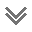

In [40]:
page_soup = BeautifulSoup(webpage, 'html.parser') # "lxml"
#page_soup = BeautifulSoup(webpage, 'lxml')
page_soup